## Research question:

#### How has the GDP of the United States of America changed with the change in female share of employment in senior and middle management (%) and female labor force participation rate (% of female population ages 15+)?

The datasets that we are going to use for answering the research questions are:
* [GDP (current USD)](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)
* [Female share of employment in senior and middle management (%)](https://data.worldbank.org/indicator/SL.EMP.SMGT.FE.ZS?locations=US)
* [Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.ZS?end=2018&locations=AF-BT-BD-IN-PK-LK-NP-MV-US-CN-1W&most_recent_value_desc=true&start=2005)

All of the above datasets have been downloaded from _World Bank_.
<br />
<br />
<br />

## Loading packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br />
<br />
<br />

## Getting familiar with the datasets:

Before we move on with reading the datasets, let us have a look at the first 5 lines for each one of them using the method *read_first_5()*:

In [2]:
def read_first_5 (path):
    '''
    Argument: 
      path - String. The path of the file whose lines are to be read.
    Returns:
      first_5 - List. A list of strings storing the values at each of 5 lines. 
    '''
    with open(path) as file:
        first_5 = [next(file) for line in range(5)]
    return first_5

<br />

In [3]:
#GDP dataset:
read_first_5('GDP.csv')

['\ufeff"Data Source","World Development Indicators",\n',
 '\n',
 '"Last Updated Date","2019-07-10",\n',
 '\n',
 '"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018",\n']

In [4]:
#Female labor force dataset:
read_first_5('female_labor_force.csv')

['\ufeff"Data Source","World Development Indicators",\n',
 '\n',
 '"Last Updated Date","2019-07-10",\n',
 '\n',
 '"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018",\n']

In [5]:
#Female employment share dataset:
read_first_5('female_emp_share.csv')

['\ufeff"Data Source","World Development Indicators",\n',
 '\n',
 '"Last Updated Date","2019-07-10",\n',
 '\n',
 '"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018",\n']

<br />
All the above files have values separated by commas and the headers (column names) being located at line 5. 
Let us now read these files with appropriate skipped rows and separators.
<br />
<br />
<br />

## Reading and cleaning the datasets:

In [6]:
gdp = pd.read_csv('GDP.csv', sep = ',', skiprows = 4)
emp_share = pd.read_csv('female_emp_share.csv', sep = ',', skiprows = 4)
labor_force = pd.read_csv('female_labor_force.csv', sep = ',', skiprows = 4) 

<br />
For answering our research question, we are only interested in the data corresponding to the USA. Thus, we must filter our datframes accordingly. 

In [7]:
gdp = gdp[gdp['Country Code'] == 'USA']
emp_share = emp_share[emp_share['Country Code'] == 'USA']
labor_force = labor_force[labor_force['Country Code'] == 'USA']

<br />
Now, the above dataframes are going to have a single row containing the information about the USA like so:

In [8]:
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
249,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,...,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.049410e+13,NaN


<br />
For future use, it is a good idea to transpose these dataframes so that we can combine them to get a single dataframe that will have the necessary information about the USA.

In [9]:
gdp = gdp.transpose()
emp_share = emp_share.transpose()
labor_force = labor_force.transpose()

<br />
<br />
<br />

## Creating the _usa_ dataframe:

In [10]:
gdp_emp = pd.concat([gdp, emp_share], axis = 1) #Concatenating gdp and emp_share by column.
usa = pd.concat([gdp_emp, labor_force], axis = 1) #Concatenating gdp_emp and labor_force by column.
usa.head()

,249,249,249
Country Name,United States,United States,United States
Country Code,USA,USA,USA
Indicator Name,GDP (current US$),Female share of employment in senior and middl...,"Labor force participation rate, female (% of f..."
Indicator Code,NY.GDP.MKTP.CD,SL.EMP.SMGT.FE.ZS,SL.TLF.CACT.FE.ZS
1960,5.433e+11,NaN,NaN


<br />
The next step after creating a dataframe is to clean it.

In [11]:
usa.dropna(inplace = True) #Dropping the NaN's.
usa.reset_index(inplace = True) #Resetting the index.
usa.head()

,index,249,249,249
0,Country Name,United States,United States,United States
1,Country Code,USA,USA,USA
2,Indicator Name,GDP (current US$),Female share of employment in senior and middl...,"Labor force participation rate, female (% of f..."
3,Indicator Code,NY.GDP.MKTP.CD,SL.EMP.SMGT.FE.ZS,SL.TLF.CACT.FE.ZS
4,2000,1.02523e+13,35.31,59.026


<br />
Looking at the above dataframe we can say:
* The actual numeraical values that we are interested in starts from index 4 (2000	1.02523e+13	35.31	59.026).
* Index 2 has the labels of the subsequent values that we might want to make the column names.
* Index 3 gives us the Indicator Code that will serve no extra purpose. 
<br />
Thus, let us rename the column values with that of the values at index 2. <br />
Since, having 'Indicator Name' as a column name for values that indicate the year for which we have data makes no sense, we might as well call the year column, 'Year'.
<br />
<br />

In [12]:
names = ['Year']+list(usa.iloc[2][1:]) #Creating a list of column names.
usa.columns = (names) #Renaming the columns.
usa = usa[4:] #Deleting the top 5 rows (including the header)
usa.head()

,Year,GDP (current US$),Female share of employment in senior and middle management (%),"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
4,2000,1.02523e+13,35.31,59.026
5,2001,1.05818e+13,35.88,58.809
6,2002,1.09364e+13,36.4,58.591
7,2003,1.14582e+13,37.38,58.458
8,2004,1.22137e+13,37.27,58.154


<br />
Our dataframe is ready but there's still one problem left to be tackled- the index values. Since, we have dropped the first 4 rows, our indexing is starting from 4 instead of 0. Thus, we need to reset our indices once again.
<br />

In [13]:
usa.reset_index(inplace = True) #This will create a new column called 'index' which will store the old index values.
usa.drop(['index'], axis= 1,inplace = True) #Dropping the 'index' column.
usa.head()

,Year,GDP (current US$),Female share of employment in senior and middle management (%),"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
0,2000,1.02523e+13,35.31,59.026
1,2001,1.05818e+13,35.88,58.809
2,2002,1.09364e+13,36.4,58.591
3,2003,1.14582e+13,37.38,58.458
4,2004,1.22137e+13,37.27,58.154


<br />
Now, that our dataframe is ready, let us move ahead with constructing appropriate plot to answer our research question. 
<br />
<br />
<br />

## Constructing the plot:

Setting the canvas:

In [14]:
fig = plt.figure(figsize = (12,8))

<br />
For the columns 'Female share of employment in senior and middle management (%)' and 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)', we have the values in percentage. 
In order to highlight the difference in their trends from the year 2000 to 2018, we are going to plot lines for their percentages.
<br />

In [15]:
fig.add_subplot(2, 1, 1) #2 row, 1 col, current axis = 1

plt.plot(usa.iloc[:,2], '--o', usa.iloc[:,3], '--o') #Plotting the lines.
plt.gca().set_xticks([]) #Turning off the x ticks for this sub-plot.

#Adding legends, labels and title:
plt.legend(['Female share of employment in senior and middle management', 'Female labor force participation rate'])
plt.ylabel('Percentage')
plt.title('Change in the US GDP wrt female labor force participation rate and share of employment in senior and middle management:')

<br />
For the 'GDP (current US$)' column, however, we are going to plot some bar charts that will take up the monetary values for each corresponding year in the duration 2000-18.
<br />

In [16]:
ax = fig.add_subplot(2, 1, 2) #2 row, 1 col, current axis = 2
ax.set_facecolor('white') #Setting the background colour to white.

x_pos = np.arange(len(usa['Year'])) #Creating a range for positioning the bars along the x-axis.
plt.xticks(x_pos, usa['Year']) #Renaming the xticks with 'Year'.

plt.bar(x_pos, usa['GDP (current US$)'], color = 'brown') #Plotting the bars.

#Adding labels:
plt.xlabel('Year')
plt.ylabel('GDP in current USD')

<br />
Now, let us view our plot.
<br />

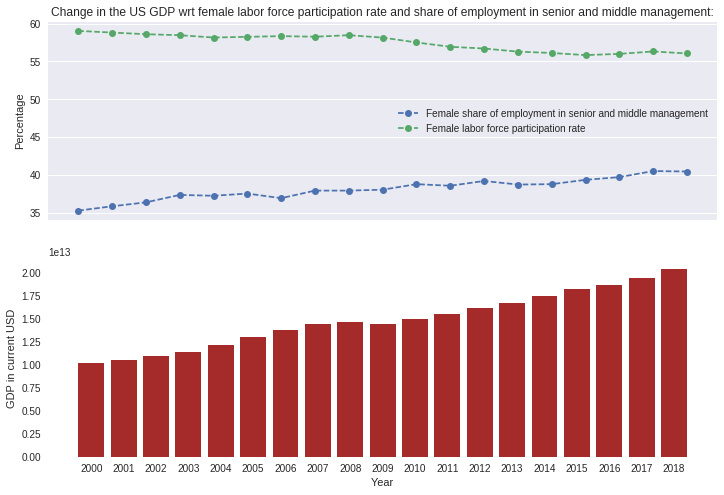

In [17]:
plt.show()

<br />
From the above plot we learn that with an increase in the US GDP, the female share of employment in senior and middle management has also shown an overall increase, from roughly 35% in 2000 to 41% in 2018, which is not the case with the female labor force participation, that evidently dropped from about 59% to 56% in the 18 years. However, since this wasn't an experimental study but an observational one, we cannot form any causal relationship. There is a correlation but, definitely no causation. 
<br />